# Introduction to GeoPandas

## Install Geopandas

Go to terminal and type in: <br> 
<code>conda install geopandas</code> <br>
<code>pip install descartes</code><br>
<code>pip install geopandas</code>

In [1]:
#!conda install geopandas #creates an env
#!pip install descartes
#!pip install geopandas

In [2]:
import geopandas as gp

In [3]:
help(gp)

Help on package geopandas:

NAME
    geopandas

PACKAGE CONTENTS
    _compat
    _config
    _decorator
    _vectorized
    _version
    array
    base
    conftest
    datasets (package)
    explore
    geodataframe
    geoseries
    io (package)
    plotting
    sindex
    testing
    tests (package)
    tools (package)

DATA
    options = Options(
      display_precision: None [default: Non...USE_PYGEO...

VERSION
    0.10.2

FILE
    /home/ubunbu/anaconda3/envs/geopandas/lib/python3.9/site-packages/geopandas/__init__.py




## Importing and ESRI Shapefile and Plotting it using GeoPandas

### Read File

In [4]:
districts = gp.read_file("./Shapefiles/districts.shp")

In [5]:
type(districts)

geopandas.geodataframe.GeoDataFrame

### Plot the file

<AxesSubplot:>

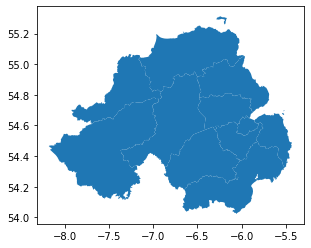

In [6]:
districts.plot()

#### Explore the perams

<AxesSubplot:>

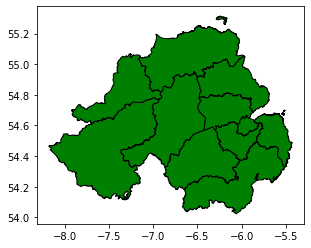

In [7]:
districts.plot(color="green", edgecolor = "black")

In [8]:
districts.head(5)

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."


#### <code> cmap, column and edgecolor perams </code><br>
Documentation to other colors:
##### https://matplotlib.org/2.0.2/users/colormaps.html for cmap colors and other information

<AxesSubplot:>

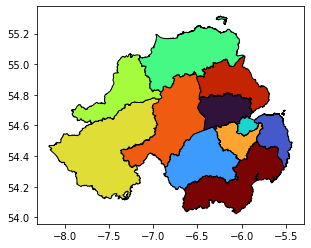

In [9]:
districts.plot(cmap = "turbo",
               column = "district",
               edgecolor = "black")


## Layer 

In [10]:
# load the data
area_of_interest = gp.read_file("./Shapefiles/area_of_interest.shp")

<AxesSubplot:>

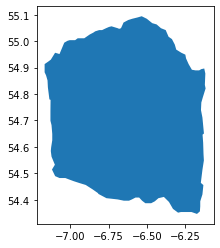

In [11]:
# view the data
area_of_interest.plot()

### Plot Side By Side

In [12]:
import matplotlib.pyplot as plt

<AxesSubplot:>

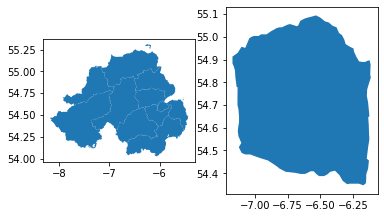

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols = 2) # side by side
districts.plot(ax = ax1)
area_of_interest.plot(ax = ax2)

##### To make it visually pleasing

<AxesSubplot:>

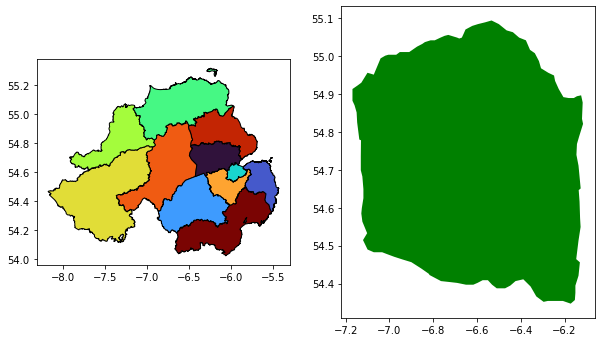

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8) )# side by side
districts.plot(ax = ax1,
               cmap = "turbo",
               column="district",
               edgecolor = "black")
area_of_interest.plot(ax = ax2, color = "green")

### Priting Multipul layers

<AxesSubplot:>

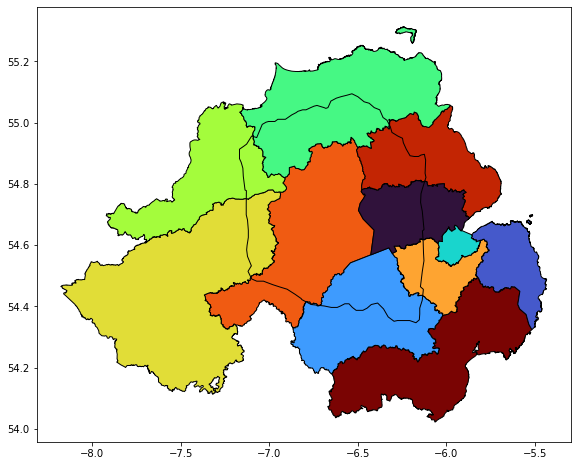

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
districts.plot(ax = ax,
               cmap = "turbo",
               column = "district",
               edgecolor = "black")
area_of_interest.plot(ax = ax, color = "none" , edgecolor = "black")

##### Lets add some ATMs to the layer

In [16]:
atms = gp.read_file("./Shapefiles/atms.shp")

<AxesSubplot:>

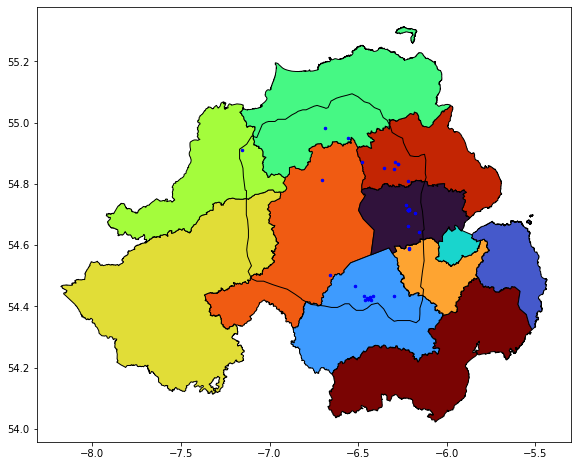

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
districts.plot(ax = ax,
               cmap = "turbo",
               column = "district",
               edgecolor = "black")
area_of_interest.plot(ax = ax, color = "none" , edgecolor = "black")
atms.plot(ax = ax, color = "blue", markersize = 6.3)

## How to work with projections in GeoPandas (WGS 84)
<code>.crs</code> attribute

In [18]:
districts.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### European Petroleum Survey Group (EPSG)


## Reprojecting GeoPandas GeoDataFrames: from one crs to another crs
https://epsg.io/32629

In [19]:
# do a convertion

<AxesSubplot:>

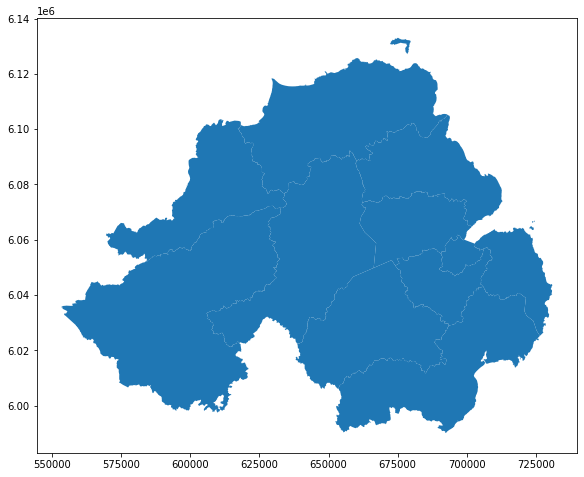

In [20]:
crs_districts = districts.to_crs(epsg = 32629)
crs_districts.plot(figsize=(10,8))

<AxesSubplot:>

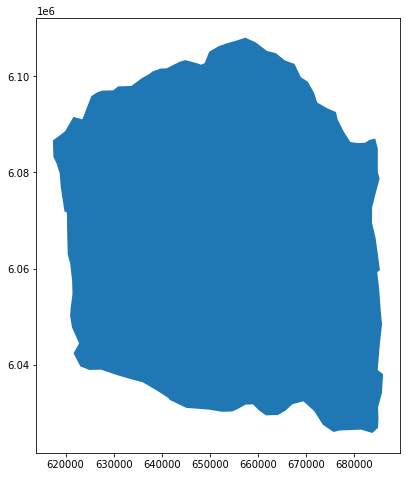

In [21]:
crs_area_of_interest = area_of_interest.to_crs(epsg=32629)
crs_area_of_interest.plot(figsize = (10,8))

Text(0.5, 51.0, 'meters')

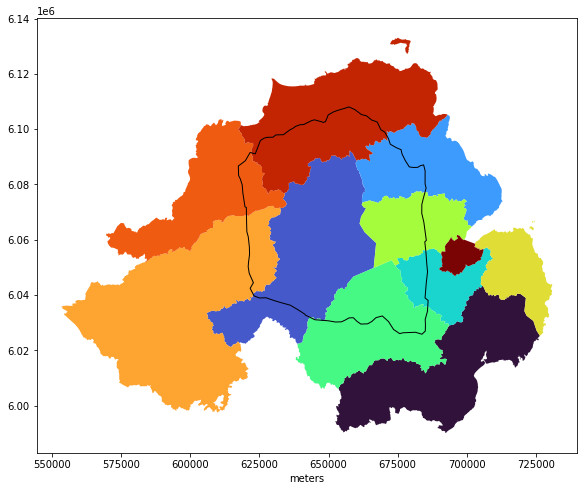

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
crs_districts.plot(ax=ax, cmap="turbo")
crs_area_of_interest.plot(ax=ax, color="none")
plt.xlabel("meters")

## How to intersect different layers

In [34]:
districts_in_aoi = gp.overlay(df1 = crs_districts, df2 = crs_area_of_interest, how="intersection")

<AxesSubplot:>

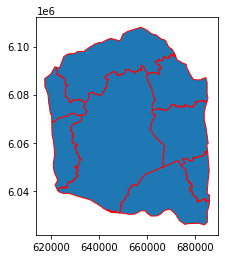

In [35]:
districts_in_aoi.plot(edgecolor = "red")

In [36]:
districts_in_aoi['district']

0                              Mid Ulster
1                     Mid and East Antrim
2                 Lisburn and Castlereagh
3    Armagh City, Banbridge and Craigavon
4                 Antrim and Newtownabbey
5                     Fermanagh and Omagh
6                 Derry City and Strabane
7                Causeway Coast and Glens
Name: district, dtype: object

## Calculate area of a district inside the area of interest

In [40]:
# create a area column for the dataframe
districts_in_aoi['area']=districts_in_aoi.area/1000000 #kilometers
districts_in_aoi

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6...",1574.420076
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6...",373.691057
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6...",151.737874
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676033.306 6048080.158, 676033...",553.932816
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6...",462.822918
5,Fermanagh and Omagh,0,"POLYGON ((628751.931 6072158.997, 628755.668 6...",262.996444
6,Derry City and Strabane,0,"POLYGON ((622292.384 6091383.856, 622290.858 6...",187.500979
7,Causeway Coast and Glens,0,"POLYGON ((671301.064 6097251.878, 671300.557 6...",747.580677


## Exporrting GeoPandas  GeoDataFrames into an ERSI Shapefile

In [46]:
districts_in_aoi.to_file("districts_within_aoi.shp" ,driver = "ESRI Shapefile")

In [47]:
# we can use the Shape file for QGIS